# Battle of restaurants between Downtown Toronto and Manhattan

#### T. Rashid
Capstone Project



IBM Data Science Professional Certificate

## 1. Introduction

A great restaurant area must have diverse selection of food. Both Manhattan and Toronto have always been food lover’s cities. Both cities are known for their diversity in food and culture. This project is to analyze the restaurants of the Downtown Toronto and Manhattan by classifying them into different associated with the restaurants. The main idea is to explore the restaurants and cluster them together on the basis of top 5 most common cuisine in each neighborhood of Toronto and Manhattan using K-means Clustering and display them on the geographical map.

This analysis can be helpful for somebody who wants to open a restaurant in either of the cities. It can help the person to decide what kind of restaurants are more common in big cities. This research cannot be solely used to decide the opening of the restaurant but it can give the future owner of the restaurant an idea of how the restaurants related to different cuisines are clustered together in the neighborhoods of the two food capital.



## 2. Data Preparation

We are going to leverage the data from Foursquare's API, of different restaurants that includes the location of the restaurant and category of the cuisine. We will also use some of the data from the CSV files that helps us with the name of the neighborhoods along with their longitudes and latitudes.
We are going to leverage the ‘Venue Category’ available in the Foursquare’s database. Since, there are so many cuisines, we are going to narrow them down to seven main categories i.e. American, Latin, European, Asian, Casual, Middle Eastern and Other. In order to do that we pulled the data that contains keywords like Taco, Pizza, Restaurant, and Sandwich etc. under the ‘Venue Category’.

There has been some assumptions made in terms of the data related to restaurants. For example, Indian, Afghani, Japanese and Chinese cuisines have been assigned to 'Asian' category as the countries associated with the cuisines do fall under 'Asian' continent, however, the cuisines are totally different from each other. Also, pizza is considered ‘European’ and tacos would have fallen under 'Latin' food category but they are put under 'Casual' category.
The analysis will be as good as the data provided. Hence, if some restaurants are not available in the Foursquare API, they won't be included in the analysis.

Information about Toronto data:
1.	The Toronto data is available on Wikipedia page that consists of three columns: Postal Code, Community, and Neighborhood.
2.	We will convert the data into CSV file and then to dataframe to perform analysis.
3.	We will only process the cells that have an assigned borough and remove the cells with a borough that is 'Not assigned'.
4.	There exist more than one neighborhood for one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma.
5.	If a cell has a borough but a 'Not assigned' neighborhood, then we will substitute its name with the name of its neighborhood.

Information about Manhattan data:
1.	New York City comprise of 5 boroughs: Bronx, Brooklyn, Manhattan, Queens and Staten Island.
2.	For this analysis, we will be using restaurant locations available in Manhattan only.


#### Toronto Data

Download all the dependencies

In [1]:
#!pip install beautifulsoup4
#!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json

#!conda install -c conda-forge geopy --yes 

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
#conda update -n base -c defaults conda

#### Code to scrape the following Wikipedia page: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M which consists of 3 columns Postal Code, Borough and Neighbourhood

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
soup=BeautifulSoup(source.text,'lxml')
tab = str(soup.table)
display_html(tab,raw=True)

Postal Code,Community,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


HTML table converted to Dataframe

In [4]:
df = pd.read_html(tab)
df1=df[0]
df1.head()

,Postal Code,Community,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### Only process the cells that have an assigned borough. Ignore cells with a borough that is 'Not assigned'. Combining the neighbourhoods with same Postal code. Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough

In [5]:
# Deleting rows where Borough is 'Not assigned'
df2 = df1[df1.Community != 'Not assigned']

# Combining the neighbourhoods with same Postal code
df3 = df2.groupby(['Postal Code','Community'], sort=False).agg(', '.join)
df3.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df3['Neighbourhood'] = np.where(df3['Neighbourhood'] == 'Not assigned',df3['Community'], df3['Neighbourhood'])

df3.head()

,Postal Code,Community,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


#### Download CSV file that has the geographical coordinates of each postal code

In [6]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merging Borough and Neighbourhood on Postal Code to find Latitude and Longitude

In [7]:
df4 = pd.merge(df3,lat_lon,on='Postal Code')
df4.head()

,Postal Code,Community,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


#### Use geopy library to get the latitude and longitude values of Toronto

In [8]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [9]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df4['Latitude'], df4['Longitude'], df4['Community'], df4['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Pulling all the rows from the data frame which contains 'Toronto' in their Borough.

In [10]:
df5 = df4[df4['Community'].str.contains('Toronto',regex=False)]
df5.reset_index(drop=True, inplace=True)
df5
#df5=df4
#df5.head(50)

,Postal Code,Community,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


#### Using Folium as Visualization Library to visualize above data

In [11]:
# create map of Toronto using latitude and longitude values
map_tor_borough = folium.Map(location=[latitude, longitude], zoom_start=12)


# add a red circle marker to represent the Toronto
folium.features.CircleMarker(
    [43.6534817, -79.3839347],
    radius=10,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(map_tor_borough)


# add markers to map
for lat, lng, label in zip(df5['Latitude'], df5['Longitude'], df5['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor_borough)  
    
map_tor_borough

#### Define Foursquare Credentials and Version

In [12]:
CLIENT_ID = 'P1U1IXAMY3VXBUF1PWZHLYHVW23FCG1DMDLPNZOQLVZHGTPI' # your Foursquare ID
CLIENT_SECRET = 'AKZERJCTMQKIDUT4ONFFSMBLWBVYTAVX2CWUV4OSW2TIB4XK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P1U1IXAMY3VXBUF1PWZHLYHVW23FCG1DMDLPNZOQLVZHGTPI
CLIENT_SECRET:AKZERJCTMQKIDUT4ONFFSMBLWBVYTAVX2CWUV4OSW2TIB4XK


Get the first neighborhood's name.

In [13]:
df5.loc[0, 'Neighbourhood']

'Regent Park, Harbourfront'

Get the neighborhood's latitude and longitude values.

In [14]:
neighborhood_latitude = df5.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df5.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df5.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues within a radius of 500 meters.

In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    #neighborhood_latitude, 
    #neighborhood_longitude, 
    latitude, 
    longitude,
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=P1U1IXAMY3VXBUF1PWZHLYHVW23FCG1DMDLPNZOQLVZHGTPI&client_secret=AKZERJCTMQKIDUT4ONFFSMBLWBVYTAVX2CWUV4OSW2TIB4XK&v=20180605&ll=43.6534817,-79.3839347&radius=500&limit=100'

Send the GET request and examine the resutls

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f5f87b57008ac04a8bba585'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 91,
  'suggestedBounds': {'ne': {'lat': 43.6579817045, 'lng': -79.37772678059432},
   'sw': {'lat': 43.6489816955, 'lng': -79.39014261940568}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          'lng'

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


Now we are ready to clean the json and structure it into a pandas dataframe.

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng,distance
0,Downtown Toronto,Neighborhood,43.653232,-79.385296,113
1,Nathan Phillips Square,Plaza,43.652270,-79.383516,138
2,Japango,Sushi Restaurant,43.655268,-79.385165,222
3,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980,161
4,Poke Guys,Poke Place,43.654895,-79.385052,181


Let's create a function to repeat the same process to all the neighborhoods

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['distance'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                        'distance',
                  'Venue Category'
                   ]
    
    return(nearby_venues)

Run the above function on each neighborhood and create a new dataframe 

In [20]:
toronto_venues = getNearbyVenues(names=df5['Neighbourhood'],
                                   latitudes=df5['Latitude'],
                                   longitudes=df5['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

#### Filter the food and drink related places only using some keywords e.g. restaurants, coffee, taco, pizza, bar etc.

In [21]:
toronto_venues_cat = toronto_venues[toronto_venues['Venue Category'].str.contains('taco|pizza|Restaurant|sandwich|steakhouse|salad|Burger|breakfast|bistro|BBQ|Hot Dog|Fried Chicken',regex=True)]
toronto_venues_cat.reset_index(drop=True, inplace=True)
toronto_venues_cat

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,distance,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,376,Restaurant
1,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,430,Mexican Restaurant
2,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,468,French Restaurant
3,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Nando's,43.661728,-79.386391,257,Portuguese Restaurant
4,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Mercatto,43.660391,-79.387664,258,Italian Restaurant
...,...,...,...,...,...,...,...,...
399,Church and Wellesley,43.665860,-79.383160,Kokoni Izakaya,43.664181,-79.380258,299,Japanese Restaurant
400,Church and Wellesley,43.665860,-79.383160,Asahi Sushi,43.669874,-79.382943,447,Sushi Restaurant
401,Church and Wellesley,43.665860,-79.383160,A&W,43.666415,-79.378235,401,Fast Food Restaurant
402,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,The Green Wood,43.664728,-79.324117,302,Restaurant


In [22]:
toronto_venues_cat['Venue Category'].unique()

array(['Restaurant', 'Mexican Restaurant', 'French Restaurant',
       'Portuguese Restaurant', 'Italian Restaurant', 'Sushi Restaurant',
       'Fried Chicken Joint', 'Chinese Restaurant', 'Thai Restaurant',
       'Burger Joint', 'Ramen Restaurant', 'New American Restaurant',
       'Japanese Restaurant', 'Fast Food Restaurant',
       'Modern European Restaurant', 'Seafood Restaurant',
       'Middle Eastern Restaurant', 'Ethiopian Restaurant',
       'American Restaurant', 'BBQ Joint', 'Latin American Restaurant',
       'Vegetarian / Vegan Restaurant', 'German Restaurant',
       'Comfort Food Restaurant', 'Asian Restaurant',
       'Moroccan Restaurant', 'Belgian Restaurant', 'Greek Restaurant',
       'Eastern European Restaurant', 'Falafel Restaurant',
       'Indian Restaurant', 'Korean Restaurant', 'Colombian Restaurant',
       'Mediterranean Restaurant', 'Brazilian Restaurant',
       'Gluten-free Restaurant', 'Vietnamese Restaurant',
       'Cuban Restaurant', 'Malay Resta

Group the categories of restaurants to perform analysis

In [23]:
# Group the types of restaurants into cusisines so that the analysis generate better results

European = ['French Restaurant','Swiss Restaurant', 'Czech Restaurant','Austrian Restaurant',  'Belgian Restaurant','German Restaurant',
        'Eastern European Restaurant','Scandinavian Restaurant', 'Souvlaki Shop', 'Molecular Gastronomy Restaurant', 
        'Modern European Restaurant','Italian Restaurant', 'Portuguese Restaurant',  'Greek Restaurant']

Middle_Eastern = ['Persian Restaurant','Israeli Restaurant', 'Kosher Restaurant','Jewish Restaurant',
                    'Lebanese Restaurant',  'Falafel Restaurant','Moroccan Restaurant',
                    'Mediterranean Restaurant','Kebab Restaurant', 'Turkish Restaurant', 'Middle Eastern Restaurant']


Latin = ['Mexican Restaurant','Venezuelan Restaurant','Argentinian Restaurant', 'Arepa Restaurant', 'Empanada Restaurant','South American Restaurant',
          'Paella Restaurant', 'Peruvian Restaurant','Tapas Restaurant', 'Spanish Restaurant','Caribbean Restaurant','Cuban Restaurant',
          'Latin American Restaurant', 'Brazilian Restaurant','Colombian Restaurant',  'Tex-Mex Restaurant']

Asian = ['Ramen Restaurant','Soba Restaurant','Japanese Restaurant','Szechuan Restaurant','Himalayan Restaurant', 'Tibetan Restaurant',
         'South Indian Restaurant',   'North Indian Restaurant','Cantonese Restaurant', 'Shanghai Restaurant','Hotpot Restaurant',
         'Asian Restaurant','Malay Restaurant',  'Afghan Restaurant','Sushi Restaurant', 'Vietnamese Restaurant','Thai Restaurant', 
         'Poke Place', 'Sri Lankan Restaurant','Indian Restaurant', 
         'Japanese Curry Restaurant', 'Japanese Restaurant', 'Dumpling Restaurant',
         'Indonesian Restaurant', 'Udon Restaurant','Taiwanese Restaurant','Korean Restaurant', 'Noodle House',
         'Falafel Restaurant', 'Filipino Restaurant', 'Dim Sum Restaurant','Chinese Restaurant',
         'Yoshoku Restaurant']

Casual = [ 'Doner Restaurant','Sandwich Place', 'Food Truck',
          'Frozen Yogurt Shop', 'Deli / Bodega', 'Dessert Shop',
          'Hot Dog Joint', 'Burger Joint', 'Breakfast Spot', 'Fondue Restaurant', 'Fast Food Restaurant','Pizza Place', 'Taco Place','Fried Chicken Joint']

American = ['Southern / Soul Food Restaurant','Theme Restaurant','Comfort Food Restaurant',  'Food & Drink Shop', 
            'Restaurant', 'American Restaurant', 'BBQ Joint', 'Theme Restaurant', 'New American Restaurant',
            'Vegetarian / Vegan Restaurant', 'Restaurant','Gluten-free Restaurant','Hawaiian Restaurant','Seafood Restaurant', 'Cajun / Creole Restaurant']

Other = ['African Restaurant','Australian Restaurant', 'Ethiopian Restaurant', 'Russian Restaurant']

def conditions(m):
    if m['Venue Category'] in European:
        return 'European'
    if m['Venue Category'] in Middle_Eastern:
        return 'Middle_Eastern'
    if m['Venue Category'] in Latin:
        return 'Latin'
    if m['Venue Category'] in Asian:
        return 'Asian'
    if m['Venue Category'] in Casual:
        return 'Casual'
    if m['Venue Category'] in American:
        return 'American'
    if m['Venue Category'] in Other:
        return 'Other'



toronto_venues_cat['categories_class']=toronto_venues_cat.apply(conditions, axis=1)
toronto_venues_cat

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,distance,Venue Category,categories_class
0,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,376,Restaurant,American
1,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,430,Mexican Restaurant,Latin
2,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,468,French Restaurant,European
3,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Nando's,43.661728,-79.386391,257,Portuguese Restaurant,European
4,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Mercatto,43.660391,-79.387664,258,Italian Restaurant,European
...,...,...,...,...,...,...,...,...,...
399,Church and Wellesley,43.665860,-79.383160,Kokoni Izakaya,43.664181,-79.380258,299,Japanese Restaurant,Asian
400,Church and Wellesley,43.665860,-79.383160,Asahi Sushi,43.669874,-79.382943,447,Sushi Restaurant,Asian
401,Church and Wellesley,43.665860,-79.383160,A&W,43.666415,-79.378235,401,Fast Food Restaurant,Casual
402,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,The Green Wood,43.664728,-79.324117,302,Restaurant,American


#### Ensuring that all the restaurants and diners have been assigned to a pre-defined category

In [24]:
toronto_venues_cat['categories_class'].unique()

array(['American', 'Latin', 'European', 'Asian', 'Casual',
       'Middle_Eastern', 'Other'], dtype=object)

In [25]:
# add locations data to the data sets of each city

toronto_venues_cat['city'] = 'Toronto'
toronto_venues_cat.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,distance,Venue Category,categories_class,city
0,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,376,Restaurant,American,Toronto
1,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,430,Mexican Restaurant,Latin,Toronto
2,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,468,French Restaurant,European,Toronto
3,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Nando's,43.661728,-79.386391,257,Portuguese Restaurant,European,Toronto
4,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Mercatto,43.660391,-79.387664,258,Italian Restaurant,European,Toronto


#### New York Data

Download New York data

In [26]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


Next, let's load the data.

In [27]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

#### Tranform the data into a *pandas* dataframe
Notice how all the relevant data is in the features key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [28]:
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)


for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [29]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [30]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [31]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


Let's get the geographical coordinates of Manhattan.

In [32]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


Let's visualize neighborhoods of Manhattan.

In [33]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)



# add a red circle marker to represent the Manhattan
folium.features.CircleMarker(
    [40.7127281, -74.0060152],
    radius=10,
    color='red',
    popup='Manhattan',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(map_manhattan)



# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Now, let's get the top 100 venues that are in Manhattan within a radius of 500 meters.

In [34]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
#

#
radius = 500 # define radius
#

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=P1U1IXAMY3VXBUF1PWZHLYHVW23FCG1DMDLPNZOQLVZHGTPI&client_secret=AKZERJCTMQKIDUT4ONFFSMBLWBVYTAVX2CWUV4OSW2TIB4XK&v=20180605&ll=40.7896239,-73.9598939&radius=500&limit=100'

Send the GET request and examine the results

In [35]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f5f88bf61e170028622dc5e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central Park',
  'headerFullLocation': 'Central Park, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 40.794123904500005,
    'lng': -73.95396136384342},
   'sw': {'lat': 40.7851238955, 'lng': -73.96582643615658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a78425df964a52053e51fe3',
       'name': 'Central Park Tennis Center',
       'location': {'address': 'Central Park West at 96th St',
        'lat': 40.78931319964619,
        'lng': -73.96186241658044,
        'labeledLatLngs': [{'label': 'disp

In [36]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [37]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng,distance
0,Central Park Tennis Center,Tennis Court,40.789313,-73.961862,169
1,North Meadow,Park,40.792027,-73.959853,267
2,East Meadow,Field,40.790160,-73.955498,375
3,Central Park - North Meadow Recreation Center,Playground,40.790939,-73.960304,150
4,Central Park - Woodman's Gate,Park,40.787786,-73.955924,392


Let's create a function for all the neighborhoods in Manhattan

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['location']['distance'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                        'distance',
                  'Venue Category']   
    
       
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.

In [39]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

manhattan_venues.head()

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,distance,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,240,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,376,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,452,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,441,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,342,Donut Shop


Let's check how many venues were returned for each neighborhood

In [40]:
manhattan_venues_cat = manhattan_venues[manhattan_venues['Venue Category'].str.contains('taco|pizza|Restaurant|sandwich|steakhouse|salad|Burger|breakfast|bistro|BBQ|Hot Dog|Fried Chicken',regex=True)]
manhattan_venues_cat.reset_index(drop=True, inplace=True)
manhattan_venues_cat

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,distance,Venue Category
0,Marble Hill,40.876551,-73.910660,Land & Sea Restaurant,40.877885,-73.905873,429,Seafood Restaurant
1,Chinatown,40.715618,-73.994279,Spicy Village,40.717010,-73.993530,167,Chinese Restaurant
2,Chinatown,40.715618,-73.994279,Kiki's,40.714476,-73.992036,228,Greek Restaurant
3,Chinatown,40.715618,-73.994279,Wah Fung Number 1 Fast Food 華豐快餐店,40.717278,-73.994177,184,Chinese Restaurant
4,Chinatown,40.715618,-73.994279,Xi'an Famous Foods,40.715232,-73.997263,255,Chinese Restaurant
...,...,...,...,...,...,...,...,...
943,Hudson Yards,40.756658,-74.000111,Spanish Diner,40.752394,-74.001491,488,Spanish Restaurant
944,Hudson Yards,40.756658,-74.000111,Il Punto Ristorante,40.756079,-73.994594,469,Italian Restaurant
945,Hudson Yards,40.756658,-74.000111,Thai Select,40.754867,-73.995007,474,Thai Restaurant
946,Hudson Yards,40.756658,-74.000111,Treadwell,40.759964,-73.996284,489,Restaurant


In [41]:
manhattan_venues_cat['Venue Category'].unique()

array(['Seafood Restaurant', 'Chinese Restaurant', 'Greek Restaurant',
       'American Restaurant', 'New American Restaurant',
       'Hotpot Restaurant', 'Spanish Restaurant', 'Asian Restaurant',
       'Thai Restaurant', 'Malay Restaurant', 'Italian Restaurant',
       'Vietnamese Restaurant', 'Mexican Restaurant',
       'Taiwanese Restaurant', 'Dim Sum Restaurant',
       'Shanghai Restaurant', 'Austrian Restaurant',
       'Vegetarian / Vegan Restaurant', 'Dumpling Restaurant',
       'Cantonese Restaurant', 'Restaurant', 'Ramen Restaurant',
       'Burger Joint', 'Tapas Restaurant', 'Indian Restaurant',
       'Latin American Restaurant', 'Caribbean Restaurant',
       'Sushi Restaurant', 'Arepa Restaurant', 'Empanada Restaurant',
       'Fast Food Restaurant', 'Japanese Restaurant',
       'Mediterranean Restaurant', 'BBQ Joint',
       'Japanese Curry Restaurant', 'Falafel Restaurant',
       'Cuban Restaurant', 'French Restaurant', 'African Restaurant',
       'Ethiopian Rest

Group the categories of restaurants to perform analysis

In [42]:
# Group the types of restaurants into cusisines so that the analysis generate better results

European = ['French Restaurant','Swiss Restaurant', 'Czech Restaurant','Austrian Restaurant',  'Belgian Restaurant','German Restaurant',
        'Eastern European Restaurant','Scandinavian Restaurant', 'Souvlaki Shop', 'Molecular Gastronomy Restaurant', 
        'Modern European Restaurant','Italian Restaurant', 'Portuguese Restaurant',  'Greek Restaurant']

Middle_Eastern = ['Persian Restaurant','Israeli Restaurant', 'Kosher Restaurant','Jewish Restaurant',
                    'Lebanese Restaurant',  'Falafel Restaurant','Moroccan Restaurant',
                    'Mediterranean Restaurant','Kebab Restaurant', 'Turkish Restaurant', 'Middle Eastern Restaurant']


Latin = ['Mexican Restaurant','Venezuelan Restaurant','Argentinian Restaurant', 'Arepa Restaurant', 'Empanada Restaurant','South American Restaurant',
          'Paella Restaurant', 'Peruvian Restaurant','Tapas Restaurant', 'Spanish Restaurant','Caribbean Restaurant','Cuban Restaurant',
          'Latin American Restaurant', 'Brazilian Restaurant','Colombian Restaurant',  'Tex-Mex Restaurant']

Asian = ['Ramen Restaurant','Soba Restaurant','Japanese Restaurant','Szechuan Restaurant','Himalayan Restaurant', 'Tibetan Restaurant',
         'South Indian Restaurant',   'North Indian Restaurant','Cantonese Restaurant', 'Shanghai Restaurant','Hotpot Restaurant',
         'Asian Restaurant','Malay Restaurant',  'Afghan Restaurant','Sushi Restaurant', 'Vietnamese Restaurant','Thai Restaurant', 
         'Poke Place', 'Sri Lankan Restaurant','Indian Restaurant', 
         'Japanese Curry Restaurant', 'Japanese Restaurant', 'Dumpling Restaurant',
         'Indonesian Restaurant', 'Udon Restaurant','Taiwanese Restaurant','Korean Restaurant', 'Noodle House',
         'Falafel Restaurant', 'Filipino Restaurant', 'Dim Sum Restaurant','Chinese Restaurant',
         'Yoshoku Restaurant']

Casual = [ 'Doner Restaurant','Sandwich Place', 'Food Truck',
          'Frozen Yogurt Shop', 'Deli / Bodega', 'Dessert Shop',
          'Hot Dog Joint', 'Burger Joint', 'Breakfast Spot', 'Fondue Restaurant', 'Fast Food Restaurant','Pizza Place', 'Taco Place','Fried Chicken Joint']

American = ['Southern / Soul Food Restaurant','Theme Restaurant','Comfort Food Restaurant',  'Food & Drink Shop', 
            'Restaurant', 'American Restaurant', 'BBQ Joint', 'Theme Restaurant', 'New American Restaurant',
            'Vegetarian / Vegan Restaurant', 'Restaurant','Gluten-free Restaurant','Hawaiian Restaurant','Seafood Restaurant', 'Cajun / Creole Restaurant']

Other = ['African Restaurant','Australian Restaurant', 'Ethiopian Restaurant', 'Russian Restaurant']

def conditions(m):
    if m['Venue Category'] in European:
        return 'European'
    if m['Venue Category'] in Middle_Eastern:
        return 'Middle_Eastern'
    if m['Venue Category'] in Latin:
        return 'Latin'
    if m['Venue Category'] in Asian:
        return 'Asian'
    if m['Venue Category'] in Casual:
        return 'Casual'
    if m['Venue Category'] in American:
        return 'American'
    if m['Venue Category'] in Other:
        return 'Other'


manhattan_venues_cat['categories_class']=manhattan_venues_cat.apply(conditions, axis=1)
manhattan_venues_cat

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,distance,Venue Category,categories_class
0,Marble Hill,40.876551,-73.910660,Land & Sea Restaurant,40.877885,-73.905873,429,Seafood Restaurant,American
1,Chinatown,40.715618,-73.994279,Spicy Village,40.717010,-73.993530,167,Chinese Restaurant,Asian
2,Chinatown,40.715618,-73.994279,Kiki's,40.714476,-73.992036,228,Greek Restaurant,European
3,Chinatown,40.715618,-73.994279,Wah Fung Number 1 Fast Food 華豐快餐店,40.717278,-73.994177,184,Chinese Restaurant,Asian
4,Chinatown,40.715618,-73.994279,Xi'an Famous Foods,40.715232,-73.997263,255,Chinese Restaurant,Asian
...,...,...,...,...,...,...,...,...,...
943,Hudson Yards,40.756658,-74.000111,Spanish Diner,40.752394,-74.001491,488,Spanish Restaurant,Latin
944,Hudson Yards,40.756658,-74.000111,Il Punto Ristorante,40.756079,-73.994594,469,Italian Restaurant,European
945,Hudson Yards,40.756658,-74.000111,Thai Select,40.754867,-73.995007,474,Thai Restaurant,Asian
946,Hudson Yards,40.756658,-74.000111,Treadwell,40.759964,-73.996284,489,Restaurant,American


#### Ensuring that all the restaurants and diners have been assigned to a pre-defined category

In [43]:
manhattan_venues_cat['categories_class'].unique()

array(['American', 'Asian', 'European', 'Latin', 'Casual',
       'Middle_Eastern', 'Other'], dtype=object)

In [44]:
#v1 = manhattan_venues_cat[manhattan_venues_cat['categories_class'].isnull()]
#v1['Venue Category'].unique()

In [45]:
# add locations data to the data sets of each city

manhattan_venues_cat['city'] = 'Manhattan'
manhattan_venues_cat.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,distance,Venue Category,categories_class,city
0,Marble Hill,40.876551,-73.910660,Land & Sea Restaurant,40.877885,-73.905873,429,Seafood Restaurant,American,Manhattan
1,Chinatown,40.715618,-73.994279,Spicy Village,40.717010,-73.993530,167,Chinese Restaurant,Asian,Manhattan
2,Chinatown,40.715618,-73.994279,Kiki's,40.714476,-73.992036,228,Greek Restaurant,European,Manhattan
3,Chinatown,40.715618,-73.994279,Wah Fung Number 1 Fast Food 華豐快餐店,40.717278,-73.994177,184,Chinese Restaurant,Asian,Manhattan
4,Chinatown,40.715618,-73.994279,Xi'an Famous Foods,40.715232,-73.997263,255,Chinese Restaurant,Asian,Manhattan


## 3. Methodology

We will analyze the data using Segmentation and K-means Clustering and visualize it on a geographical map to get better idea how the restaurants are being clustered in the neighborhoods. We will also look into the distribution by categories of restaurants in each of the cities. At the end we will suggest some of the potential ways to find an ideal location for an upcoming restaurant.

At this point we need to perform some exploratory data analysis to cluster these neighborhoods based on the restaurant categories. We are going to use folium library to visualize the geographical details of Toronto and Manhattan along with their neighborhoods. 

We will leverage the Foursquare API to explore the restaurants in the neighborhoods, distance from the neighborhood, category of the restaurant etc. For this analysis we restricted the list of restaurants to 100 venues and 500 meter radius for each neighborhood from their given latitude and longitude. 
Here is the head of the data after the coordinates were merged together with the list of restaurants obtained using Foursquare API. Please note that the restaurants were divided into seven main categories i.e. American, Latino, Euro, Asian, Casual, Middle Eastern and Other by creating a separate column called as ‘categories_class’. 

For this analysis we will be using unsupervised k-means algorithm to cluster the neighborhoods. First, we will group rows by neighborhood and then take the mean of the frequency of occurrence of each of the restaurant category. This will help us cluster the neighborhoods together. We are going to cluster the neighborhoods into 5 clusters and then we will define each cluster.


Let's check how many venues were returned for each neighborhood

##### Toronto

In [46]:
toronto_venues_cat.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,distance,Venue Category,categories_class,city
Neighborhood,,,,,,,,,
Berczy Park,13,13,13,13,13,13,13,13,13
"Brockton, Parkdale Village, Exhibition Place",2,2,2,2,2,2,2,2,2
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",2,2,2,2,2,2,2,2,2
Central Bay Street,22,22,22,22,22,22,22,22,22
Christie,2,2,2,2,2,2,2,2,2
Church and Wellesley,25,25,25,25,25,25,25,25,25
"Commerce Court, Victoria Hotel",30,30,30,30,30,30,30,30,30
Davisville,9,9,9,9,9,9,9,9,9
"Dufferin, Dovercourt Village",1,1,1,1,1,1,1,1,1


##### Manhattan

In [47]:
manhattan_venues_cat.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,distance,Venue Category,categories_class,city
Neighborhood,,,,,,,,,
Battery Park City,7,7,7,7,7,7,7,7,7
Carnegie Hill,24,24,24,24,24,24,24,24,24
Central Harlem,17,17,17,17,17,17,17,17,17
Chelsea,21,21,21,21,21,21,21,21,21
Chinatown,40,40,40,40,40,40,40,40,40
Civic Center,24,24,24,24,24,24,24,24,24
Clinton,29,29,29,29,29,29,29,29,29
East Harlem,15,15,15,15,15,15,15,15,15
East Village,40,40,40,40,40,40,40,40,40


#### Analyze Each Neighborhood

##### Toronto

In [48]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues_cat[['categories_class']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues_cat['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,American,Asian,Casual,European,Latin,Middle_Eastern,Other
0,"Regent Park, Harbourfront",1,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,1,0,0
2,"Regent Park, Harbourfront",0,0,0,1,0,0,0
3,"Queen's Park, Ontario Provincial Government",0,0,0,1,0,0,0
4,"Queen's Park, Ontario Provincial Government",0,0,0,1,0,0,0


##### New York

In [49]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues_cat[['categories_class']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues_cat['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,American,Asian,Casual,European,Latin,Middle_Eastern,Other
0,Marble Hill,1,0,0,0,0,0,0
1,Chinatown,0,1,0,0,0,0,0
2,Chinatown,0,0,0,1,0,0,0
3,Chinatown,0,1,0,0,0,0,0
4,Chinatown,0,1,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [50]:
# Toronto

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,American,Asian,Casual,European,Latin,Middle_Eastern,Other
0,Berczy Park,0.461538,0.230769,0.000000,0.307692,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
3,Central Bay Street,0.181818,0.363636,0.090909,0.272727,0.000000,0.090909,0.000000
4,Christie,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.200000,0.520000,0.080000,0.000000,0.080000,0.080000,0.040000
6,"Commerce Court, Victoria Hotel",0.600000,0.233333,0.033333,0.100000,0.033333,0.000000,0.000000
7,Davisville,0.222222,0.444444,0.000000,0.333333,0.000000,0.000000,0.000000
8,"Dufferin, Dovercourt Village",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
9,"First Canadian Place, Underground city",0.419355,0.354839,0.064516,0.032258,0.096774,0.032258,0.000000


In [51]:
#Manhattan

manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,American,Asian,Casual,European,Latin,Middle_Eastern,Other
0,Battery Park City,0.142857,0.285714,0.285714,0.142857,0.142857,0.000000,0.000000
1,Carnegie Hill,0.125000,0.333333,0.125000,0.250000,0.083333,0.083333,0.000000
2,Central Harlem,0.352941,0.117647,0.058824,0.117647,0.117647,0.000000,0.235294
3,Chelsea,0.285714,0.285714,0.000000,0.238095,0.095238,0.095238,0.000000
4,Chinatown,0.150000,0.675000,0.000000,0.100000,0.075000,0.000000,0.000000
5,Civic Center,0.250000,0.250000,0.041667,0.333333,0.041667,0.041667,0.041667
6,Clinton,0.275862,0.206897,0.103448,0.241379,0.068966,0.103448,0.000000
7,East Harlem,0.133333,0.200000,0.066667,0.066667,0.533333,0.000000,0.000000
8,East Village,0.150000,0.350000,0.050000,0.150000,0.250000,0.050000,0.000000
9,Financial District,0.300000,0.150000,0.150000,0.100000,0.100000,0.200000,0.000000


#### Let's print each neighborhood along with the top 5 most common restaurant category

In [52]:
# Toronto

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['category','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
   category  freq
0  American  0.46
1  European  0.31
2     Asian  0.23
3    Casual  0.00
4     Latin  0.00


----Brockton, Parkdale Village, Exhibition Place----
   category  freq
0  American   0.5
1  European   0.5
2     Asian   0.0
3    Casual   0.0
4     Latin   0.0


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
   category  freq
0  American   0.5
1    Casual   0.5
2     Asian   0.0
3  European   0.0
4     Latin   0.0


----Central Bay Street----
         category  freq
0           Asian  0.36
1        European  0.27
2        American  0.18
3          Casual  0.09
4  Middle_Eastern  0.09


----Christie----
   category  freq
0  American   0.5
1  European   0.5
2     Asian   0.0
3    Casual   0.0
4     Latin   0.0


----Church and Wellesley----
         category  freq
0           Asian  0.52
1        American  0.20
2          Casual  0.08
3           Latin  0.08
4  Middle_Eastern  0.08


----Commerce Court, Victoria 

In [53]:
# Manhattan

num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['category','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
   category  freq
0     Asian  0.29
1    Casual  0.29
2  American  0.14
3  European  0.14
4     Latin  0.14


----Carnegie Hill----
   category  freq
0     Asian  0.33
1  European  0.25
2  American  0.12
3    Casual  0.12
4     Latin  0.08


----Central Harlem----
   category  freq
0  American  0.35
1     Other  0.24
2     Asian  0.12
3  European  0.12
4     Latin  0.12


----Chelsea----
         category  freq
0        American  0.29
1           Asian  0.29
2        European  0.24
3           Latin  0.10
4  Middle_Eastern  0.10


----Chinatown----
   category  freq
0     Asian  0.68
1  American  0.15
2  European  0.10
3     Latin  0.08
4    Casual  0.00


----Civic Center----
   category  freq
0  European  0.33
1  American  0.25
2     Asian  0.25
3    Casual  0.04
4     Latin  0.04


----Clinton----
         category  freq
0        American  0.28
1        European  0.24
2           Asian  0.21
3          Casual  0.10
4  Middle_Eastern  0.10


----East Harlem-

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [65]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [61]:
#Toronto

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Tor_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
Tor_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    Tor_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

Tor_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,American,European,Asian,Other,Middle_Eastern
1,"Brockton, Parkdale Village, Exhibition Place",European,American,Other,Middle_Eastern,Latin
2,"Business reply mail Processing Centre, South C...",Casual,American,Other,Middle_Eastern,Latin
3,Central Bay Street,Asian,European,American,Middle_Eastern,Casual
4,Christie,European,American,Other,Middle_Eastern,Latin


In [66]:
# Manhattan

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Manh_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
Manh_neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    Manh_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

Manh_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Battery Park City,Casual,Asian,Latin,European,American
1,Carnegie Hill,Asian,European,Casual,American,Middle_Eastern
2,Central Harlem,American,Other,Latin,European,Asian
3,Chelsea,Asian,American,European,Middle_Eastern,Latin
4,Chinatown,Asian,American,European,Latin,Other


#### Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [62]:
# Toronto


# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([3, 2, 3, 0, 2], dtype=int32)

In [67]:
# Manhattan


# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([4, 4, 1, 4, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [63]:
# Toronto


# add clustering labels
Tor_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df5

# merge toronto_grouped with df5 to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(Tor_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged = toronto_merged.dropna().reset_index(drop=True)

toronto_merged.head() # check the last columns!

,Postal Code,Community,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.0,Latin,European,American,Other,Middle_Eastern
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,European,Asian,Latin,Casual,American
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.0,Asian,European,Casual,American,Middle_Eastern
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3.0,American,European,Asian,Middle_Eastern,Latin
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,3.0,American,European,Asian,Other,Middle_Eastern


In [68]:
#Manhattan

# add clustering labels
Manh_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_merged with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(Manh_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged = manhattan_merged.dropna().reset_index(drop=True)

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3.0,American,Other,Middle_Eastern,Latin,European
1,Manhattan,Chinatown,40.715618,-73.994279,0.0,Asian,American,European,Latin,Other
2,Manhattan,Washington Heights,40.851903,-73.936900,2.0,Latin,Asian,American,European,Casual
3,Manhattan,Inwood,40.867684,-73.921210,2.0,Latin,American,Asian,Casual,Other
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2.0,Latin,Asian,Casual,Middle_Eastern,European


## 4. Results

Here are the results based on our analysis. The observation is based on the top 5 most common restaurant categories in a particular neighborhood. 

4.1 Toronto:

The neighborhoods of Toronto clustered together using k-means algorithm are based on the categories and frequency of occurrence of the restaurants defined as follows:
1. Cluster #0: Asian restaurants
2. Cluster #1: Middle Eastern restaurants (The neighborhood seems unique/outlier)
3. Cluster #2: European restaurants
4. Cluster #3: American restaurants
5. Cluster #4: Asian restaurants (The neighborhood seems unique/outlier)

Based on the clusters #0 and #3, Asian and American restaurants are mostly concentrated together in the neighborhoods close to each other. 

4.2 Manhattan:

The neighborhoods of Manhattan clustered together using k-means algorithm are based on the categories and frequency of occurrence of the restaurants defined as follows:
1. Cluster #0: Asian restaurants (American and Latin being 2nd most common)
2. Cluster #1: American and European restaurants 
3. Cluster #2: Asian and Latin restaurants
4. Cluster #3: American restaurants (The neighborhood seems unique/outlier)
5. Cluster #4: Asian restaurants (European being 2nd most common)

Based on the cluster #4, Asian restaurants are spread out evenly in most of the Manhattan’s neighborhoods along with European restaurants. 



Finally, let's visualize the resulting clusters

In the following maps, the blue dots represents the Neighborhoods and the black dot with the red circle shows the coordinates of Toronto and Manhattan.

#### Create map for Toronto

In [64]:
# create map for Toronto


map_clusters = folium.Map(location=[43.6534817, -79.3839347], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add a red circle marker to represent the Toronto
folium.features.CircleMarker(
    [43.6534817, -79.3839347],
    radius=10,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(map_clusters)




# add markers to the map
markers_colors = []
for lat, lon, poi, cat, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'],toronto_merged['1st Most Common Venue'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' , ' + str(cat) +  ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-5],
        fill=True,
        fill_color=rainbow[cluster-5],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Create map for Manhattan

In [69]:
# create map for Manhattan


map_clusters = folium.Map(location=[40.7127281, -74.0060152], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add a red circle marker to represent the Manhattan
folium.features.CircleMarker(
    [40.7127281, -74.0060152],
    radius=10,
    color='red',
    popup='Manhattan',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(map_clusters)




# add markers to the map
markers_colors = []
for lat, lon, poi, cat, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'],manhattan_merged['1st Most Common Venue'], manhattan_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' , ' + str(cat) +  ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-5],
        fill=True,
        fill_color=rainbow[cluster-5],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

Now, we can examine each cluster and determine the discriminating restaurant categories that distinguish each cluster. Based on the most common restaurant type we can see how algorithm has clustered each neighborhood.

#### Cluster #0

Toronto: Most common are Asian restaurants

In [70]:
toronto_merged.loc[toronto_merged['Cluster Labels'].astype(int) == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,"Queen's Park, Ontario Provincial Government",0.0,European,Asian,Latin,Casual,American
2,"Garden District, Ryerson",0.0,Asian,European,Casual,American,Middle_Eastern
5,Central Bay Street,0.0,Asian,European,American,Middle_Eastern,Casual
10,"Little Portugal, Trinity",0.0,Asian,American,European,Latin,Other
14,"India Bazaar, The Beaches West",0.0,European,Casual,Asian,American,Other
18,"High Park, The Junction South",0.0,Latin,Casual,Asian,European,American
22,Davisville,0.0,Asian,European,American,Other,Middle_Eastern
23,"University of Toronto, Harbord",0.0,Asian,European,American,Other,Middle_Eastern
24,"Runnymede, Swansea",0.0,European,Asian,American,Middle_Eastern,Latin
25,"Kensington Market, Chinatown, Grange Park",0.0,Asian,Latin,American,Casual,European


Manhattan: Most common are Asian restaurants

In [71]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'].astype(int) == 0, manhattan_merged.columns[[1] + list(range(4, manhattan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Chinatown,0.0,Asian,American,European,Latin,Other
15,Midtown,0.0,Asian,Latin,Middle_Eastern,European,Casual
20,Lower East Side,0.0,Asian,Latin,Middle_Eastern,European,American
33,Midtown South,0.0,Asian,American,Casual,Middle_Eastern,European


#### Cluster #1

Toronto: Most common is Middle Eastern restaurant

In [72]:
toronto_merged.loc[toronto_merged['Cluster Labels'].astype(int) == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,"Dufferin, Dovercourt Village",1.0,Middle_Eastern,Other,Latin,European,Casual


Manhattan: Most common are American and European restaurants

In [73]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(4, manhattan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Central Harlem,1.0,American,Other,Latin,European,Asian
8,Upper East Side,1.0,European,American,Asian,Latin,Middle_Eastern
11,Roosevelt Island,1.0,European,Asian,American,Other,Middle_Eastern
13,Lincoln Square,1.0,European,American,Middle_Eastern,Latin,Casual
14,Clinton,1.0,American,European,Asian,Middle_Eastern,Casual
21,Tribeca,1.0,European,American,Asian,Latin,Casual
23,Soho,1.0,European,Middle_Eastern,Latin,Asian,American
24,West Village,1.0,American,European,Asian,Middle_Eastern,Latin
26,Morningside Heights,1.0,American,Casual,Other,Middle_Eastern,Latin
29,Financial District,1.0,American,Middle_Eastern,Casual,Asian,Latin


#### Cluster #2

Toronto: Most common are European restaurants

In [74]:
toronto_merged.loc[toronto_merged['Cluster Labels'].astype(int) == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Regent Park, Harbourfront",2.0,Latin,European,American,Other,Middle_Eastern
6,Christie,2.0,European,American,Other,Middle_Eastern,Latin
11,"The Danforth West, Riverdale",2.0,European,American,Asian,Latin,Other
13,"Brockton, Parkdale Village, Exhibition Place",2.0,European,American,Other,Middle_Eastern,Latin
21,"Parkdale, Roncesvalles",2.0,European,Latin,American,Other,Middle_Eastern


Manhattan: Most common are Asian and Latin restaurants

In [75]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(4, manhattan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Washington Heights,2.0,Latin,Asian,American,European,Casual
3,Inwood,2.0,Latin,American,Asian,Casual,Other
4,Hamilton Heights,2.0,Latin,Asian,Casual,Middle_Eastern,European
5,Manhattanville,2.0,Asian,American,Latin,European,Middle_Eastern
7,East Harlem,2.0,Latin,Asian,American,European,Casual
19,East Village,2.0,Asian,Latin,European,American,Middle_Eastern
25,Manhattan Valley,2.0,Asian,Latin,European,American,Other
36,Tudor City,2.0,Asian,Latin,American,European,Middle_Eastern


#### Cluster #3

Toronto: Most common are American restaurants

In [76]:
toronto_merged.loc[toronto_merged['Cluster Labels'].astype(int) == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,St. James Town,3.0,American,European,Asian,Middle_Eastern,Latin
4,Berczy Park,3.0,American,European,Asian,Other,Middle_Eastern
7,"Richmond, Adelaide, King",3.0,American,Asian,Latin,Casual,Middle_Eastern
9,"Harbourfront East, Union Station, Toronto Islands",3.0,American,Asian,Casual,European,Latin
12,"Toronto Dominion Centre, Design Exchange",3.0,American,Asian,European,Casual,Other
15,"Commerce Court, Victoria Hotel",3.0,American,Asian,European,Latin,Casual
16,Studio District,3.0,American,Middle_Eastern,Latin,European,Asian
19,"North Toronto West, Lawrence Park",3.0,Latin,Casual,Asian,American,Other
20,"The Annex, North Midtown, Yorkville",3.0,Middle_Eastern,Casual,Asian,American,Other
26,"Summerhill West, Rathnelly, South Hill, Forest...",3.0,Asian,American,Casual,Other,Middle_Eastern


Manhattan: Most common is American restaurant

In [77]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(4, manhattan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Marble Hill,3.0,American,Other,Middle_Eastern,Latin,European


#### Cluster #4

Toronto: Most common are Asian restaurants

In [78]:
toronto_merged.loc[toronto_merged['Cluster Labels'].astype(int) == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,"Forest Hill North & West, Forest Hill Road Park",4.0,Asian,Other,Middle_Eastern,Latin,European


Manhattan: Most common are Asian restaurants

In [79]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(4, manhattan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Yorkville,4.0,Asian,European,Latin,Casual,American
10,Lenox Hill,4.0,European,Asian,Latin,Casual,American
12,Upper West Side,4.0,Asian,European,American,Middle_Eastern,Latin
16,Murray Hill,4.0,Asian,American,European,Middle_Eastern,Latin
17,Chelsea,4.0,Asian,American,European,Middle_Eastern,Latin
18,Greenwich Village,4.0,Asian,European,American,Latin,Middle_Eastern
22,Little Italy,4.0,Asian,Middle_Eastern,European,Latin,American
27,Gramercy,4.0,Asian,American,European,Latin,Casual
28,Battery Park City,4.0,Casual,Asian,Latin,European,American
30,Carnegie Hill,4.0,Asian,European,Casual,American,Middle_Eastern


## 5. Discussion

Here are some charts that shows the distribution of the restaurants by category in the city of Toronto and Manhattan.

Toronto:
    
Based on the chart below we can conclude that Toronto has majority of American (approx. 34%) restaurants followed by Asian (approx. 30%) and European (approx. 17%) restaurants. 


#### Distribution of restaurants in Toronto by category

<BarContainer object of 7 artists>

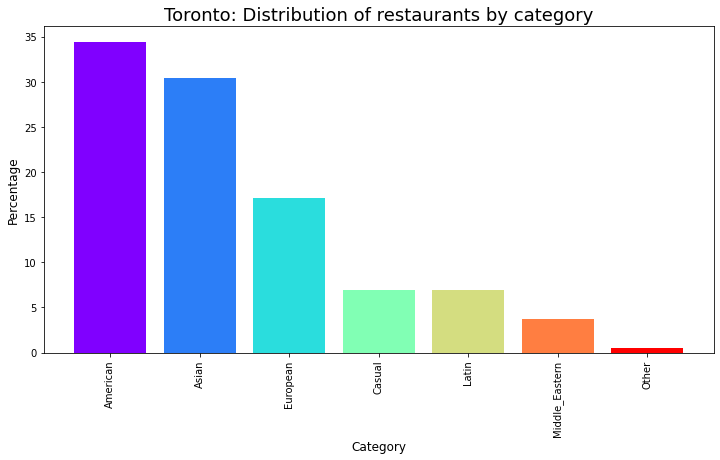

In [80]:
import matplotlib.pyplot as plt

cat_distribution = (toronto_venues_cat['categories_class'].value_counts()/toronto_venues_cat['categories_class'].value_counts().sum())*100
colors = cm.rainbow(np.linspace(0, 1, len(cat_distribution.index)))
plt.figure(figsize = (12, 6))
plt.xticks(rotation = 90)
plt.xlabel("Category", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title("Toronto: Distribution of restaurants by category", fontsize = 18)
plt.bar(cat_distribution.index, cat_distribution.values, color = colors)

Manhattan:

Based on the above chart we can conclude that Manhattan has majority of Asian (approx. 32%) restaurants followed by European (approx. 21%) and American (approx. 20%) restaurants. 


#### Distribution of restaurants in Manhattan by category

<BarContainer object of 7 artists>

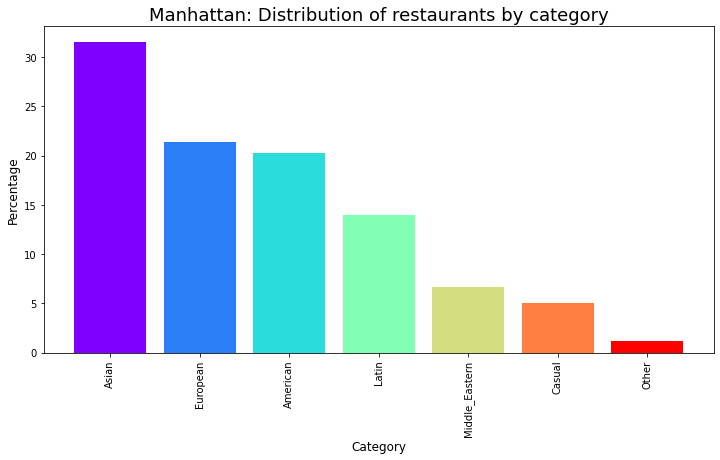

In [83]:
import matplotlib.pyplot as plt

cat_distribution = (manhattan_venues_cat['categories_class'].value_counts()/manhattan_venues_cat['categories_class'].value_counts().sum())*100
colors = cm.rainbow(np.linspace(0, 1, len(cat_distribution.index)))
plt.figure(figsize = (12, 6))
plt.xticks(rotation = 90)
plt.xlabel("Category", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.title("Manhattan: Distribution of restaurants by category", fontsize = 18)
plt.bar(cat_distribution.index, cat_distribution.values, color = colors)

In [ ]:
#M_group = M_onehot.groupby('city').mean().reset_index()
#M_trans=M_group.drop(columns=['city']).transpose()
#M_trans

The following chart shows the average distance between the neighborhood and European restaurants. Let’s say if there is a future restaurant owner and wants to open a European restaurant in Toronto then he/she would need to look at the following neighborhoods as shown. Then check the cluster that is assigned to that neighborhood and see if the European restaurants are common within that neighborhood. For example, Cluster #2 under Toronto has a hub of European restaurants. There is a great potential to open a European restaurant as it is the most common restaurant category. Another way of looking at is that Cluster #2 has enough European restaurants so maybe it is not wise to open a European restaurant there. There is some potential in Cluster #0 to open European restaurant as it is the second most common type of restaurant.

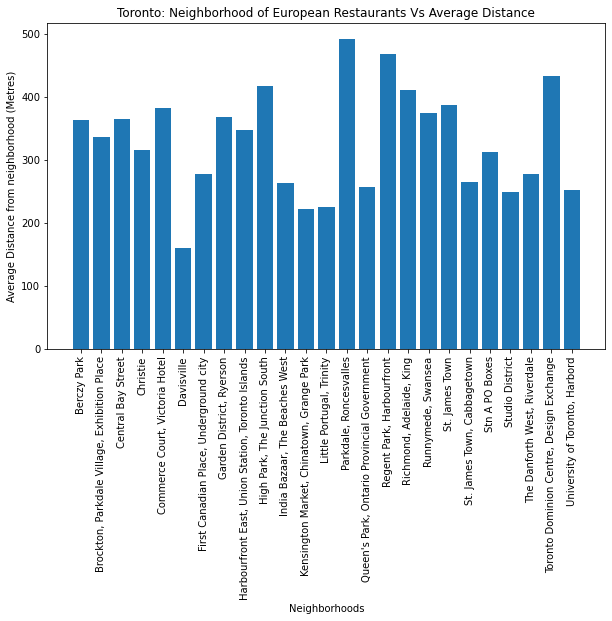

In [292]:
tor_dist = toronto_venues_cat[toronto_venues_cat['categories_class'] == 'European'].reset_index(drop=True)


distance_restaurant_df=tor_dist[['Neighborhood','distance']].groupby('Neighborhood').mean().reset_index(drop=False)

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_restaurant_df.Neighborhood))
    plt.figure(figsize = (10, 6))
    plt.bar(distance_restaurant_df.Neighborhood, distance_restaurant_df.distance)
    plt.xlabel('Neighborhoods')
    plt.ylabel('Average Distance from neighborhood (Metres)')
    plt.xticks(distance_restaurant_df.Neighborhood,rotation=90)
    plt.title('Toronto: Neighborhood of European Restaurants Vs Average Distance')
    plt.show()
plot_bar_x()



The following chart shows the average distance between the neighborhood and Latin restaurants. Let’s say if there is a future restaurant owner and wants to open a Latin restaurant in Manhattan then he/she would need to look at the following neighborhoods as shown. Then check the cluster that is assigned to that neighborhood and see if the Latin restaurants are common within that neighborhood. For example, Cluster #2 under Manhattan is packed with Latin restaurants. So, may be it is not a good idea to open another Latin restaurant within the same cluster of neighborhoods. But seems like there is a great potential in Cluster #0 with Latin restaurants being second common in that neighborhood.

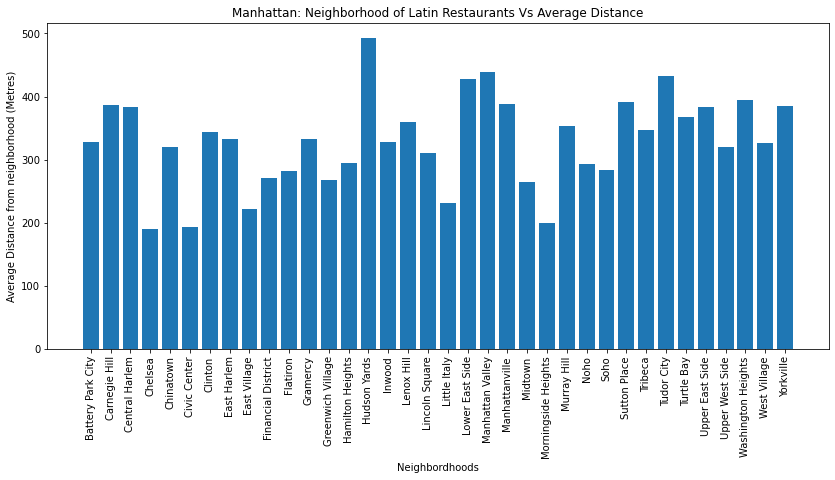

In [293]:
man_dist = manhattan_venues_cat[manhattan_venues_cat['categories_class'] == 'Latin'].reset_index(drop=True)


distance_restaurant_df=man_dist[['Neighborhood','distance']].groupby('Neighborhood').mean().reset_index(drop=False)

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_restaurant_df.Neighborhood))
    plt.figure(figsize = (14, 6))
    plt.bar(distance_restaurant_df.Neighborhood, distance_restaurant_df.distance)
    plt.xlabel('Neighbordhoods')
    plt.ylabel('Average Distance from neighborhood (Metres)')
    plt.xticks(distance_restaurant_df.Neighborhood,rotation=90)
    plt.title('Manhattan: Neighborhood of Latin Restaurants Vs Average Distance')
    plt.show()
plot_bar_x()



## 6. Conclusion

Overall, American and Asian are the most common type of category of restaurants in Toronto and Manhattan, respectively. Based on the analysis we can conclude that Toronto has Asian and American restaurants that are concentrated together in the neighborhoods. However, Manhattan has Asian restaurants that are spread out evenly in most of the neighborhoods along with European restaurants. The analysis performed is really a high level analysis using k-means clustering. This can be used as a starting point if someone is trying to open a restaurant in either of the cities. 

The analysis is as good as the data. We noticed that there are some restaurants that cannot be found in Foursquare API but we see it on Google. Basically, the analysis can generate different results if all the restaurants are to be included. Also, the analysis is highly dependent on the accuracy of the latitudes and longitudes of the neighborhoods as well as the neighborhoods associated with the restaurants. Therefore, the project can be leveraged for the initial thoughts of opening a restaurant as we require more data to get comfortable with the ideal location of the restaurant. 

In terms of comparing the neighborhoods of both the cities it would be a great idea to include some other metrics like foot traffic, ‘likes’ associated with the restaurants, ratings, tips, etc. Then we can cluster the restaurants together and analyze using Logistic Regression or Multiple Linear Regression that if the metrics chosen are better predictor to analyze the category of restaurants of Toronto and Manhattan.

For further analysis, we can analyze population density, crime rate, and average income of the population of the neighborhoods of both the cities. These metrics play a vital role in starting up new business in a particular neighborhood.
